In [1]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-abnrrldu
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0945a448704b25a0897ed24abd45ab4d0b0d6f3c2_-py3-none-any.whl size=144533 sha256=cc1b2a8efaec44d5d1db6cc64885c380d02e92b212ca36c4f737760aae16f781
  Stored in directory: /tmp/pip-ephem-wheel-cache-ut69dhd_/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#ff1177','#7711ff','Wallpoet','Orbitron',25,10
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' 
    style='font-family:"""+font+\
    """; color:"""+fontcolor+\
    """; font-size:"""+str(fontsize)+"""px;'>
    %s</h1>"""%string))

In [3]:
dhtml('Code Modules, Setting, & Functions')

In [4]:
import warnings,urllib,imageio
import pylab as pl,tensorflow as tf
import pandas as pd,numpy as np
from mpl_toolkits.mplot3d import Axes3D
from tensorflow_docs.vis import embed
from tensorflow.keras.preprocessing import image as tkimg
from PIL import Image,ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES=True

In [5]:
dhtml('Data')

In [6]:
path='../input/image-examples-for-mixed-styles/'
fp1='beethoven.csv'
fp2='castle.csv'
b=pd.read_csv(path+fp1)
c=pd.read_csv(path+fp2)
display(b.head(3).style\
.background_gradient(cmap='Spectral',axis=0))
(c.head(3)/50).style\
.background_gradient(cmap='Spectral',axis=0)

In [7]:
n=min(b.shape[0],c.shape[0]); n
b,c=b.loc[:n-1].values,c.loc[:n-1].values
b.shape[0],c.shape[0]

(3189, 3189)

In [8]:
dhtml('Interpolation')

In [9]:
def interpolate_hypersphere(v1,v2,steps):
    v1norm=tf.norm(v1)
    v2norm=tf.norm(v2)
    v2normalized=v2*(v1norm/v2norm)
    vectors=[]
    for step in range(steps):
        interpolated=v1+(v2normalized-v1)*step/(steps-1)
        interpolated_norm=tf.norm(interpolated)
        interpolated_normalized=\
        interpolated*(v1norm/interpolated_norm)
        vectors.append(interpolated_normalized)
    return tf.stack(vectors).numpy()

In [10]:
steps=12
a=interpolate_hypersphere(b,c,steps)
a.shape

(12, 3189, 3)

In [11]:
dhtml('Plotting')

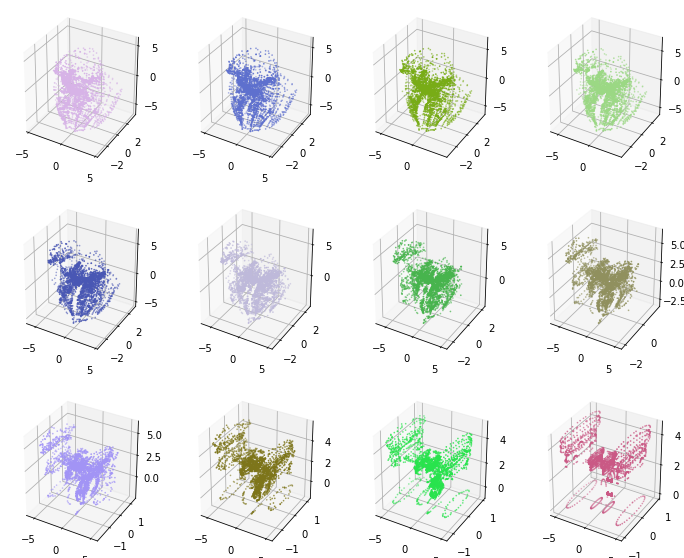

In [12]:
f=pl.figure(figsize=(12,10))
for i in range(steps):
    ax=f.add_subplot(3,steps//3,i+1,projection='3d')
    ax.scatter3D(a[i][:,0],a[i][:,1],a[i][:,2],
                 color=np.random.random(3),s=.5);

In [13]:
dhtml('Trajectory Checking')

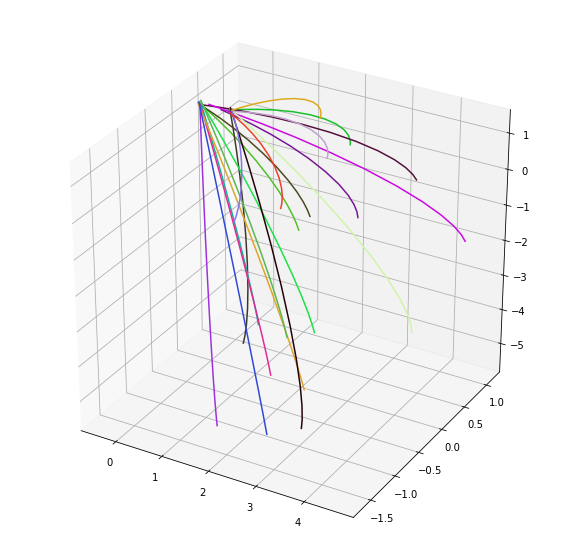

In [14]:
f=pl.figure(figsize=(10,10))
ax=f.add_subplot(111,projection='3d')
for i in range(100,300,10):
    x=np.squeeze(a[:,i:i+1,0])
    y=np.squeeze(a[:,i:i+1,1])
    z=np.squeeze(a[:,i:i+1,2])
    ax.plot(x,y,z,color=np.random.random(3));

In [15]:
dhtml('Polyhedrons')
#{Cuboctahedron,GreatRhombicosidodecahedron,GreatRhombicuboctahedron,Icosidodecahedron,
#SmallRhombicosidodecahedron,SmallRhombicuboctahedron,SnubCube,SnubDodecahedron,TruncatedCube,
#TruncatedDodecahedron,TruncatedIcosahedron,TruncatedOctahedron,TruncatedTetrahedron}

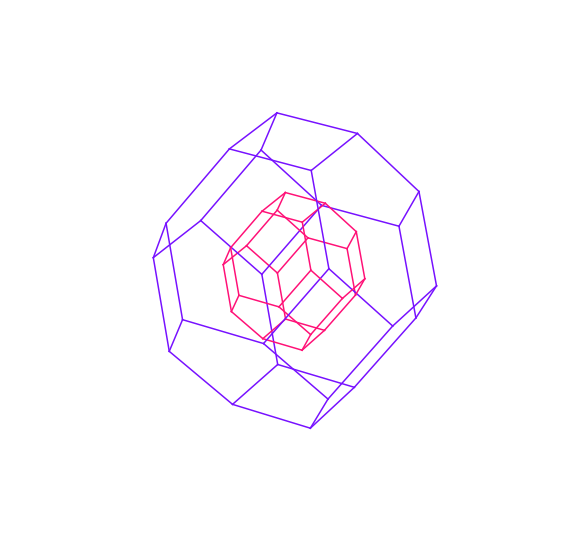

In [16]:
dfv=pd.read_csv(path+'TruncatedOctahedron.csv')
dfe=pd.read_csv(path+'TruncatedOctahedron2.csv')
display(dfv.head(3).style\
.background_gradient(cmap='Spectral',axis=0))
display(dfe.head(3).style\
.background_gradient(cmap='Spectral',axis=0))
f=pl.figure(figsize=(10,10))
ax=f.add_subplot(111,projection='3d')
v=dfv.values; e=dfe.values
for i in range(e.shape[0]):
    ax.plot(v[e[i]-1,0],v[e[i]-1,1],v[e[i]-1,2],color=c1);
    ax.plot(2*v[e[i]-1,0],2*v[e[i]-1,1],2*v[e[i]-1,2],color=c2)
ax.set_axis_off(); pl.show()

In [17]:
dfv2=pd.read_csv(path+'TruncatedIcosahedron.csv')
dfe2=pd.read_csv(path+'TruncatedIcosahedron2.csv')
display(dfv2.head(3).style\
.background_gradient(cmap='Spectral',axis=0))
display(dfe2.head(3).style\
.background_gradient(cmap='Spectral',axis=0))
v2=dfv2.values; e2=dfe2.values
for j in range(2):
    f=pl.figure(figsize=(10,10))
    ax=f.add_subplot(111,projection='3d')
    for i in range(e2.shape[0]):
        ax.plot((j+1)*v2[e2[i]-1,0],
                (j+1)*v2[e2[i]-1,1],
                (j+1)*v2[e2[i]-1,2],
                color=c1)
    ax.set_xlim([-5,5]); ax.set_ylim([-5,5])
    ax.set_zlim([-5,5]); ax.set_axis_off()
    pl.savefig('vf%s'%(j+1)); pl.close()

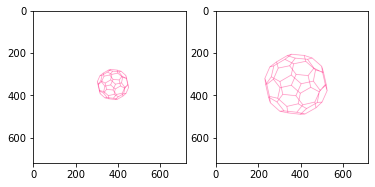

(60, 720, 720, 3)

In [18]:
def show_interpolate(f1,f2,steps):
    img1=tf.image.decode_image(tf.io.read_file(f1))
    img1=img1.numpy()[:,:,:3]/255.
    pl.subplot(1,2,1); pl.imshow(img1)
    img2=tf.image.decode_image(tf.io.read_file(f2))
    img2=img2.numpy()[:,:,:3]/255.
    pl.subplot(1,2,2); pl.imshow(img2)
    pl.show()
    if1=interpolate_hypersphere(img1,img2,steps)
    if2=interpolate_hypersphere(img2,img1,steps)
    return np.vstack([if1,if2])
images=show_interpolate('vf1.png','vf2.png',30)
images.shape


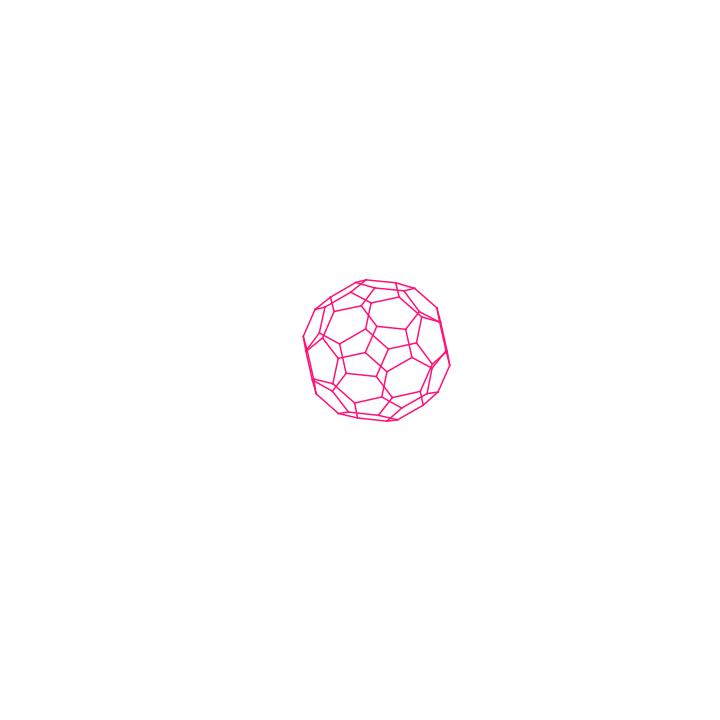

In [19]:
def animate(images):
    converted_images=np.clip(images*255,0,255)\
    .astype(np.uint8)
    imageio.mimsave('animation.gif',converted_images)
    return embed.embed_file('animation.gif')
animate(images)